<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/BJ/16236_%EC%95%84%EA%B8%B0%EC%83%81%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아기상어

N×N 크기의 공간에 물고기 M마리와 아기 상어 1마리가 있다. 공간은 1×1 크기의 정사각형 칸으로 나누어져 있다. 한 칸에는 물고기가 최대 1마리 존재한다.

아기 상어와 물고기는 모두 크기를 가지고 있고, 이 크기는 자연수이다. 가장 처음에 아기 상어의 크기는 2이고, 아기 상어는 1초에 상하좌우로 인접한 한 칸씩 이동한다.

아기 상어는 자신의 크기보다 큰 물고기가 있는 칸은 지나갈 수 없고, 나머지 칸은 모두 지나갈 수 있다. 아기 상어는 자신의 크기보다 작은 물고기만 먹을 수 있다. 따라서, 크기가 같은 물고기는 먹을 수 없지만, 그 물고기가 있는 칸은 지나갈 수 있다.

아기 상어가 어디로 이동할지 결정하는 방법은 아래와 같다.

* 더 이상 먹을 수 있는 물고기가 공간에 없다면 아기 상어는 엄마 상어에게 도움을 요청한다.  
* 먹을 수 있는 물고기가 1마리라면, 그 물고기를 먹으러 간다.  
* 먹을 수 있는 물고기가 1마리보다 많다면, 거리가 가장 가까운 물고기를 먹으러 간다.  
 * 거리는 아기 상어가 있는 칸에서 물고기가 있는 칸으로 이동할 때, 지나야하는 칸의 개수의 최솟값이다.  
 * 거리가 가까운 물고기가 많다면, 가장 위에 있는 물고기, 그러한 물고기가 여러마리라면, 가장 왼쪽에 있는 물고기를 먹는다.

아기 상어의 이동은 1초 걸리고, 물고기를 먹는데 걸리는 시간은 없다고 가정한다. 즉, 아기 상어가 먹을 수 있는 물고기가 있는 칸으로 이동했다면, 이동과 동시에 물고기를 먹는다. 물고기를 먹으면, 그 칸은 빈 칸이 된다.


아기 상어는 자신의 크기와 같은 수의 물고기를 먹을 때 마다 크기가 1 증가한다. 예를 들어, 크기가 2인 아기 상어는 물고기를 2마리 먹으면 크기가 3이 된다.

공간의 상태가 주어졌을 때, 아기 상어가 몇 초 동안 엄마 상어에게 도움을 요청하지 않고 물고기를 잡아먹을 수 있는지 구하는 프로그램을 작성하시오.

## 입력 출력 및 예제


* 입력

첫째 줄에 공간의 크기 N(2 ≤ N ≤ 20)이 주어진다.

둘째 줄부터 N개의 줄에 공간의 상태가 주어진다. 공간의 상태는 0, 1, 2, 3, 4, 5, 6, 9로 이루어져 있고, 아래와 같은 의미를 가진다.

* 0: 빈 칸
* 1, 2, 3, 4, 5, 6: 칸에 있는 물고기의 크기
* 9: 아기 상어의 위치


아기 상어는 공간에 한 마리 있다.

* 출력

첫째 줄에 아기 상어가 엄마 상어에게 도움을 요청하지 않고 물고기를 잡아먹을 수 있는 시간을 출력한다.

* 예제

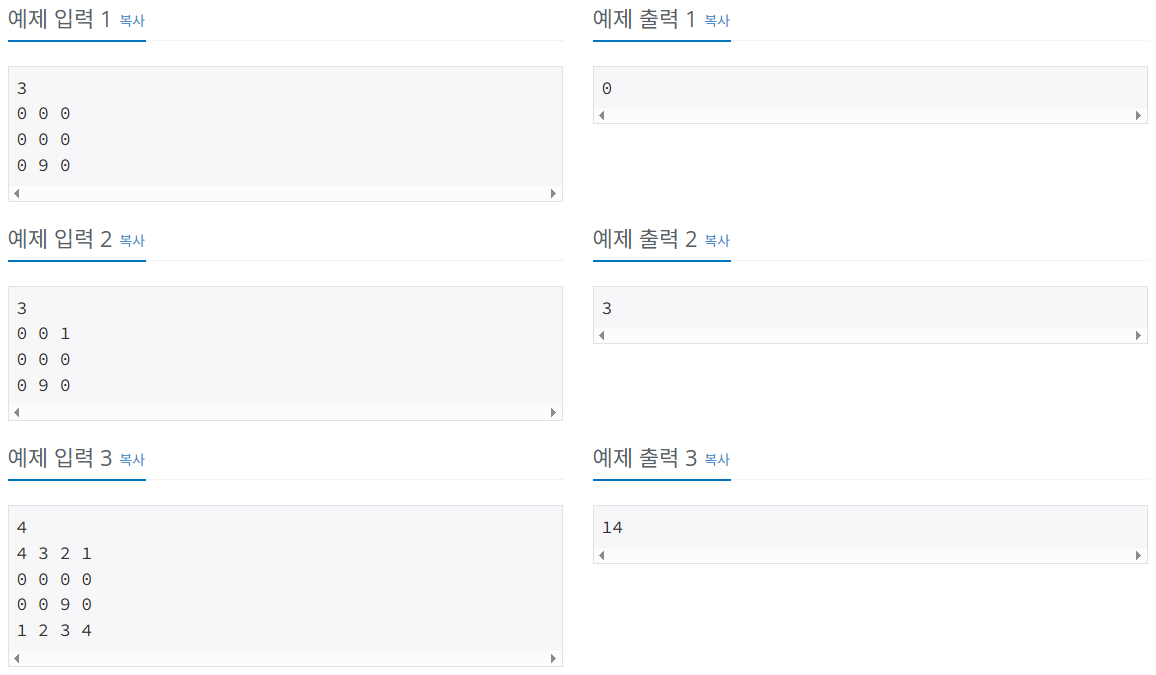

## 구상

- 물고기 게임 방식으로, 더 이상 먹을 수 있는 물고기가 없어질 떄(엄마 상어에게 도움 요청) 까지의 시간을 구하는 문제
- 상어의 상,하,좌,우 로의 이동과 물고기 크기에 따른 이동 조건을 생각하기
- 상어의 크기가 커지는 조건 생각하기
- BFS 방식으로 진행

## 코드

In [1]:
if not None:
    print(1)

1


In [2]:
from collections import deque

# 입력 받기
N = int(input())
graph = [list(map(int, input().split())) for _ in range(N)]

# 방향 이동 (상, 하, 좌, 우)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def bfs(shark_x, shark_y, shark_size):
    queue = deque([(shark_x, shark_y, 0)])
    visited =[[False]* N for _ in range(N)]
    visited[shark_x][shark_y] = True
    eatable_fish = []

    while queue:
        x, y, dist = queue.popleft()

        for dx, dy in directions:
            nx, ny = x + dx, y + dy

            if 0 <= nx < N and 0 <= ny < N and not visited[nx][ny]:
                if graph[nx][ny] <= shark_size:
                    queue.append((nx,ny,dist +1))
                    visited[nx][ny] = True

                    if 0 < graph[nx][ny] < shark_size:
                        eatable_fish.append((nx, ny, dist + 1))

    if eatable_fish:
        eatable_fish.sort(key=lambda x: (x[2], x[0], x[1]))
        return eatable_fish[0]

    return None


# 상어가 있는 곳을 큐에 추가 (초기 상태)
for i in range(N):
    for j in range(N):
        if graph[i][j] == 9:
            shark_x, shark_y = i, j
            graph[i][j] = 0
            break

shark_size = 2
shark_exp = 0
total_time = 0

while True:
    result = bfs(shark_x, shark_y, shark_size)

    if not result:
        break

    shark_x, shark_y, dist = result
    graph[shark_x][shark_y] = 0
    shark_exp += 1
    total_time += dist

    if shark_exp == shark_size:
        shark_size += 1
        shark_exp = 0

print(total_time)

3
0 0 0
0 0 0
0 9 0


TypeError: cannot unpack non-iterable int object

## 메모

* 처음 DFS로 접근했다가 BFS 방식으로 바꾸었다. DFS로 접근 시 백트래킹이 과도하게 발생하는 단점이 있다
* 상어 위치를 기준으로 BFS 방식으로 하는 것이 좋았다.